In [1]:
import dataInterpreter as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics import adjusted_rand_score

In [19]:
data = dt.get_data('A549', 'healthy_ace2', 'sars-cov2_ace2')
columns_healthy = dt.get_columns('A549', 'healthy_ace2')
columns_sars_cov2 = dt.get_columns('A549', 'sars-cov2_ace2')

filtered_data = dt.get_p_values('welch', data, columns_healthy, columns_sars_cov2)
filtered_data

,Series6_A549-ACE2_Mock_1,Series6_A549-ACE2_Mock_2,Series6_A549-ACE2_Mock_3,Series16_A549-ACE2_Mock_1,Series16_A549-ACE2_Mock_2,Series16_A549-ACE2_Mock_3,Series6_A549-ACE2_SARS-CoV-2_1,Series6_A549-ACE2_SARS-CoV-2_2,Series6_A549-ACE2_SARS-CoV-2_3,Series16_A549-ACE2_SARS-CoV-2_1,Series16_A549-ACE2_SARS-CoV-2_2,Series16_A549-ACE2_SARS-CoV-2_3,p-value
LINC00115,3.806662,1.386294,3.367296,1.098612,2.708050,2.197225,4.663439,3.218876,2.772589,3.828641,4.158883,4.330733,0.023795
NOC2L,7.636752,5.257495,7.356918,5.075174,6.688355,6.385194,5.910797,4.744932,4.442651,4.672829,4.595120,4.644391,0.008976
MIR429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147,0.000000,0.000000,0.049332
SDF4,7.770223,5.424950,7.461066,5.648974,7.132498,6.785588,6.045005,5.147494,4.787492,5.463832,5.455321,5.342334,0.011175
ACAP3,6.568078,4.143135,6.329721,3.526361,5.056246,4.779123,4.983607,3.850148,3.091042,3.583519,3.610918,3.583519,0.042887
...,...,...,...,...,...,...,...,...,...,...,...,...,...
F8A1,5.257495,2.484907,5.099866,3.737670,4.820282,4.499810,3.367296,2.890372,2.772589,3.401197,2.995732,3.135494,0.019422
FUNDC2,6.590301,3.951244,6.135565,4.990433,6.313548,6.276643,4.820282,3.433987,3.465736,4.927254,4.852030,4.859812,0.028337
MTCP1,4.682131,2.079442,4.343805,3.135494,4.430817,4.369448,3.135494,2.079442,2.397895,3.091042,2.397895,3.295837,0.038054
BRCC3,6.938284,4.605170,6.400257,5.123964,6.889591,6.513230,5.043425,4.094345,4.043051,4.962845,4.962845,5.030438,0.010822


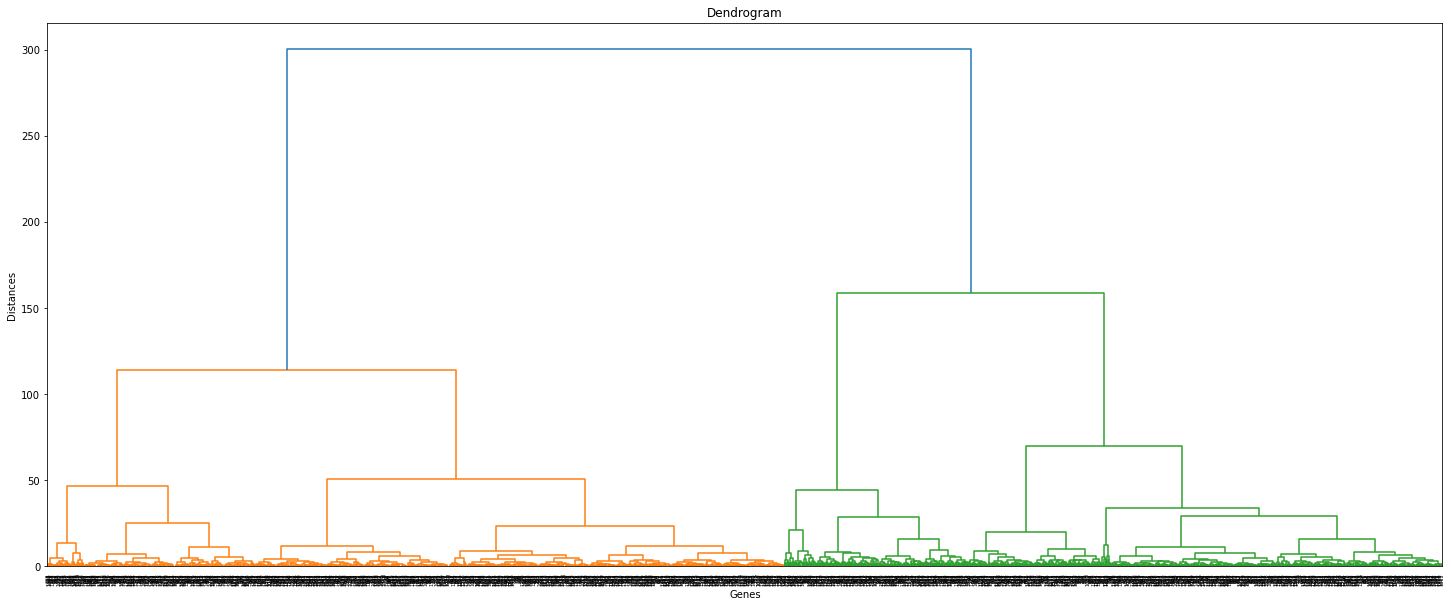

In [6]:
filtered_data.drop(['p-value'], axis = 1, inplace = True)
dt.plot_dendrogram(filtered_data)

In [7]:
labels = {}

models = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
labels['distance'] = models.fit_predict(filtered_data)

In [8]:
labels['distance']

array([0, 2, 1, ..., 0, 1, 0], dtype=int64)

In [9]:
dissimilarity = 1 - np.abs(filtered_data.T.corr())
hierarchy = linkage(squareform(dissimilarity), method='ward')
labels['pearson'] = fcluster(hierarchy, 3, criterion='maxclust') - 1

In [10]:
labels['pearson']

array([2, 1, 1, ..., 2, 1, 2], dtype=int32)

In [11]:
dissimilarity = 1 - np.abs(filtered_data.T.corr(method='spearman'))
hierarchy = linkage(squareform(dissimilarity), method='ward')
labels['spearman'] = fcluster(hierarchy, 3, criterion='maxclust') - 1

In [12]:
labels['spearman']

array([2, 2, 2, ..., 2, 1, 2], dtype=int32)

In [13]:
from itertools import groupby

clusters = {}

for key1, label1 in labels.items():
    clusters[key1] = [list(map(lambda x: x[0], v)) for k,v in groupby(sorted(zip(filtered_data.index, labels['spearman']), key = lambda x: x[1]), lambda s: s[1])]
    
    for key2, label2 in labels.items():
        if key1 != key2:
            print(key1, ' vs ', key2, ': ', adjusted_rand_score(label1, label2))

distance  vs  pearson :  0.02851254077608106
distance  vs  spearman :  0.01920196175100068
pearson  vs  distance :  0.02851254077608106
pearson  vs  spearman :  0.3491697774910073
spearman  vs  distance :  0.01920196175100068
spearman  vs  pearson :  0.3491697774910073


In [ ]:
i = 0
for c in clusters['distance']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

In [ ]:
i = 0
for c in clusters['pearson']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

In [ ]:
i = 0
for c in clusters['spearman']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

## Clustering on columns

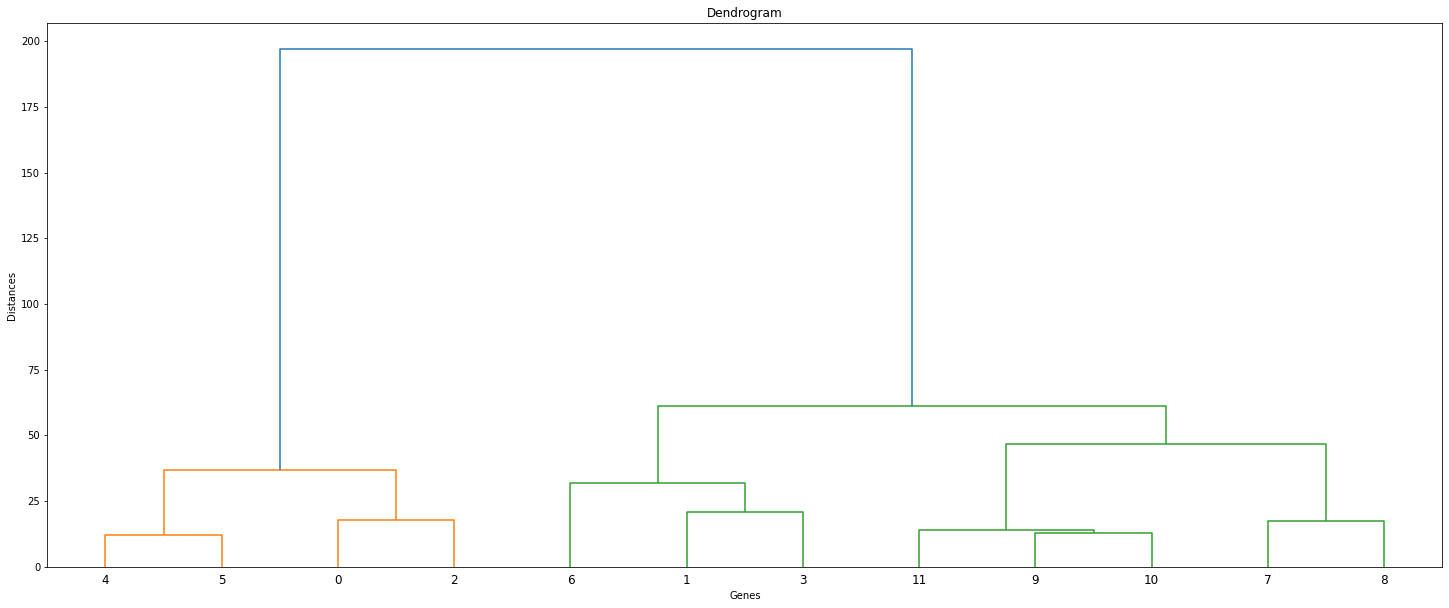

In [17]:
dt.plot_dendrogram(filtered_data.T)

In [18]:
labels_columns = {}

models = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
labels_columns['distance'] = models.fit_predict(filtered_data.T)

labels_true = [0 if col in columns_healthy else 1 for col in filtered_data.columns]

print("True: ", labels_true)
print("Predicted: ", labels_columns['distance'])
print(adjusted_rand_score(labels_true, labels_columns['distance']))

True:  [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
Predicted:  [1 0 1 0 1 1 0 0 0 0 0 0]
0.39560439560439553
